# Начальные модули

In [2]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#подключение ГПУ
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#для репитативности результатов
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

cuda


In [35]:
#отключение предупреждений
import warnings 
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Чтение и синтез данных

**считали ключи (название файла - бактерия)**


In [ ]:
profiles_ID = pd.read_csv("profiles_group_ID.csv", sep=';', header=None)
profiles_ID

In [37]:
t = pd.read_csv("MS_profiles/0a2c8dcb-9e19-47a4-9f35-0d7a5728eaa7", sep=';', index_col=0, header=None)
t = t.T
t[15001.0] = 0

# пустой словарь для удобного считывания 
MS_profiles=pd.DataFrame({k: pd.Series(dtype=float) for k in t.columns})

#считываем каждый файл
for i in profiles_ID.index:
    s = pd.read_csv("MS_profiles/"+profiles_ID.at[i, 0], sep=';', index_col=0, header=None)
    s = s.T
    s[15001.0] = profiles_ID.at[i, 1]
    s[15002.0] = profiles_ID.at[i, 2]
    MS_profiles = MS_profiles.append(s)

#делаем красивые индексы
MS_profiles.index = profiles_ID.index
MS_profiles

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3581396273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles = MS_profiles.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_

,3000.0,3001.0,3002.0,3003.0,3004.0,3005.0,3006.0,3007.0,3008.0,3009.0,...,14993.0,14994.0,14995.0,14996.0,14997.0,14998.0,14999.0,15000.0,15001.0,15002.0
0,0.0,0.006989,0.009474,0.011865,0.014919,0.013818,0.014891,0.014112,0.011084,0.013803,...,0.002440,0.002064,0.001836,0.001591,0.001053,0.000658,0.000551,0.0,Bacillus_licheniformis,KUskv2(1)
1,0.0,0.004705,0.005630,0.006658,0.007763,0.007013,0.005352,0.005495,0.008364,0.010875,...,0.003029,0.002438,0.001868,0.001774,0.001079,0.000677,0.000545,0.0,Bacillus_licheniformis,KUskv2(1)
2,0.0,0.004297,0.005857,0.006299,0.005749,0.005669,0.006205,0.005808,0.007874,0.010852,...,0.000879,0.000885,0.000811,0.000625,0.000871,0.000786,0.000364,0.0,Bacillus_licheniformis,KUskv2(1)
3,0.0,0.008850,0.014245,0.018715,0.022316,0.027317,0.035863,0.039533,0.033606,0.027822,...,0.003156,0.002286,0.001744,0.001688,0.001384,0.000959,0.000605,0.0,Bacillus_licheniformis,KU16oc(1)2011
4,0.0,0.003600,0.010289,0.010546,0.010758,0.014952,0.012372,0.011998,0.013489,0.008498,...,0.001187,0.000998,0.000950,0.001003,0.000939,0.000655,0.000255,0.0,Bacillus_licheniformis,KU16oc(1)2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.0,0.002941,0.001378,0.003481,0.005927,0.006573,0.008819,0.009778,0.009787,0.010087,...,0.001064,0.001024,0.000923,0.000894,0.000749,0.000473,0.000252,0.0,Bacillus_atrophaeus,47(11)il
145,0.0,0.004210,0.006997,0.009099,0.007007,0.004293,0.003677,0.002448,0.002965,0.003225,...,0.001017,0.001101,0.000811,0.000429,0.000261,0.000131,0.000261,0.0,Bacillus_atrophaeus,47(8)il
146,0.0,0.030378,0.036577,0.031172,0.029491,0.023378,0.025313,0.024803,0.014782,0.009577,...,0.000300,0.000667,0.000930,0.001027,0.001127,0.000947,0.000256,0.0,Bacillus_atrophaeus,47(8)il
147,0.0,0.004619,0.004678,0.004688,0.004471,0.002587,0.002639,0.003947,0.006853,0.008931,...,0.001599,0.001406,0.000913,0.000516,0.000499,0.000422,0.000263,0.0,Bacillus_chungangenis,45(3)il


## inference noise

In [95]:
#редкостно убогий кусок кода, но вообще хз как это сделать по другому
noise_factor = 7/40
MS_profiles_inference = pd.DataFrame({k: pd.Series(dtype=float) for k in t.columns})
for i in pd.unique(MS_profiles[15002.0]):
    s = MS_profiles.loc[MS_profiles[15002.0] == i]
    s.index = {i for i in range (len(s.index))}#красивые индексы    
    group = s.at[0, 15001.0]
    ID = s.at[0, 15002.0]
    s = s.drop(columns = [15001.0, 15002.0], axis = 1)
    s = s.sample(ignore_index = True)
    s = s +  noise_factor*\
    np.random.normal(loc=0.0, scale=1.0, size = \
    (len(MS_profiles.columns) - 2))#шумим
    s = abs(s)
    s[15001.0] = group
    s[15002.0] = ID
    MS_profiles_inference = MS_profiles_inference.append(s)
MS_profiles_inference.index = {i for i in range (len(MS_profiles_inference.index))}#красивые индексы    
MS_profiles_inference

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inferenc

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inferenc

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inference = MS_profiles_inference.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\4293256230.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_inferenc

,3000.0,3001.0,3002.0,3003.0,3004.0,3005.0,3006.0,3007.0,3008.0,3009.0,...,14993.0,14994.0,14995.0,14996.0,14997.0,14998.0,14999.0,15000.0,15001.0,15002.0
0,0.339639,0.115343,0.065936,0.142309,0.108054,0.096986,0.244493,0.143910,0.377854,0.084826,...,0.127491,0.260615,0.117575,0.243469,0.220727,0.150270,0.010606,0.058803,Bacillus_licheniformis,KUskv2(1)
1,0.038447,0.256531,0.311588,0.310599,0.055116,0.084188,0.256754,0.425180,0.001526,0.311549,...,0.058415,0.214569,0.402107,0.073803,0.214636,0.271340,0.029315,0.097810,Bacillus_licheniformis,KU16oc(1)2011
2,0.335649,0.114297,0.192573,0.076447,0.147253,0.007054,0.023344,0.000278,0.037725,0.205659,...,0.136619,0.159257,0.082197,0.228138,0.146541,0.129964,0.045525,0.065714,Bacillus_licheniformis,KU16oc(3)2011
3,0.308544,0.059491,0.199289,0.001462,0.157020,0.075049,0.127248,0.007294,0.075426,0.063417,...,0.221399,0.046714,0.274737,0.116928,0.158736,0.232671,0.170801,0.107535,Bacillus_licheniformis,KG16(2011)1_(k14dt)-fs
4,0.061777,0.176565,0.054874,0.268554,0.289991,0.191376,0.050444,0.074238,0.215346,0.317769,...,0.002521,0.256166,0.256572,0.052356,0.419761,0.060001,0.119982,0.040077,Bacillus_licheniformis,2U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.305105,0.036951,0.210101,0.182006,0.014947,0.192844,0.043625,0.027103,0.239338,0.189931,...,0.345894,0.094580,0.058633,0.117223,0.166772,0.108536,0.082264,0.124365,Anoxybacillus_flavithermus,Seya
70,0.194983,0.469892,0.007495,0.077580,0.025427,0.002946,0.101591,0.039523,0.112417,0.191901,...,0.038546,0.104407,0.060997,0.063527,0.312283,0.043329,0.470616,0.609153,E-Coli,E-Coli
71,0.111697,0.147148,0.011864,0.207375,0.007509,0.044986,0.025651,0.030110,0.127509,0.049184,...,0.031227,0.240742,0.196982,0.225947,0.326055,0.088480,0.300654,0.275701,Bacillus_atrophaeus,47(11)il
72,0.132480,0.033434,0.305561,0.068753,0.055847,0.199203,0.161362,0.247336,0.134526,0.095173,...,0.083015,0.008443,0.006117,0.095706,0.031406,0.421817,0.162801,0.006881,Bacillus_atrophaeus,47(8)il


In [96]:
MS_profiles_inference.to_csv(r"MS_profiles\MS_profiles_sintes_norm_noise_70%_inference", sep=';', header=True, index=True,)

## norm noise n%

In [97]:
noise_factor = 7/40
MS_profiles_sintes = pd.DataFrame({k: pd.Series(dtype=float) for k in t.columns})
for i in tqdm(MS_profiles.index):
    MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
    for j in range (20):
        s = MS_profiles.loc[i].copy()
#         rand_index = random.sample(delta.columns.tolist(), 6000)
#         for k in rand_index:
        s.loc[:15000.0] = s.loc[:15000.0] +  noise_factor*\
        np.random.normal(loc=0.0, scale=1.0, size = \
        (len(MS_profiles.columns) - 2))#шумим
        s.loc[:15000.0] = abs(s.loc[:15000.0])
        MS_profiles_sintes = MS_profiles_sintes.append(s)
 

  0%|          | 0/149 [00:00<?, ?it/s]

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(MS_profiles.loc[i])
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = M

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sintes.append(s)
C:\Users\mishs\AppData\Local\Temp\ipykernel_14392\3912981422.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MS_profiles_sintes = MS_profiles_sinte

In [98]:
MS_profiles_sintes.index = {i for i in range (len(MS_profiles_sintes.index))}#красивые индексы
MS_profiles_sintes.to_csv(r"MS_profiles\MS_profiles_sintes_norm_noise_70%", sep=';', header=True, index=True,)

# Чтение из файла для тренировок 

In [153]:
MS_profiles_sintes=pd.read_csv("MS_profiles\MS_profiles_sintes_full_noise_1e-2", sep=';', index_col=0, header=0)
MS_profiles_sintes

,3000.0,3001.0,3002.0,3003.0,3004.0,3005.0,3006.0,3007.0,3008.0,3009.0,...,14993.0,14994.0,14995.0,14996.0,14997.0,14998.0,14999.0,15000.0,15001.0,15002.0
0,0.000000,0.006989,0.009474,0.011865,0.014919,0.013818,0.014891,0.014112,0.011084,0.013803,...,0.002440,0.002064,0.001836,0.001591,0.001053,0.000658,0.000551,0.000000,Bacillus_licheniformis,KUskv2t1(1)
1,0.007313,0.013938,0.014750,0.006966,0.014828,0.012808,0.017923,0.019887,0.002961,0.004370,...,0.005857,0.006673,0.009541,0.010383,0.004015,0.008366,0.008383,0.006958,Bacillus_licheniformis,KUskv2t1(1)
2,0.000435,0.015809,0.019351,0.011824,0.023598,0.018181,0.022701,0.011030,0.003904,0.004140,...,0.012167,0.011262,0.006807,0.003807,0.010370,0.001349,0.000063,0.009756,Bacillus_licheniformis,KUskv2t1(1)
3,0.007757,0.001331,0.000973,0.004458,0.010547,0.021161,0.024628,0.012870,0.002637,0.020423,...,0.012325,0.005027,0.009708,0.001062,0.009265,0.006616,0.009516,0.007590,Bacillus_licheniformis,KUskv2t1(1)
4,0.009745,0.011968,0.010912,0.021210,0.011922,0.007094,0.005605,0.011333,0.013676,0.013832,...,0.000855,0.011289,0.009245,0.008980,0.009023,0.003088,0.008388,0.008149,Bacillus_licheniformis,KUskv2t1(1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,0.009394,0.008386,0.009074,0.004583,0.002929,0.006659,0.014556,0.011760,0.017440,0.021321,...,0.010809,0.009078,0.008580,0.011124,0.001862,0.009470,0.008352,0.002091,Bacillus_chungangenis,45(3)il
3167,0.002889,0.009418,0.008417,0.000243,0.001700,0.016935,0.014160,0.018519,0.003089,0.016207,...,0.004894,0.004727,0.009947,0.003794,0.007648,0.001698,0.006608,0.007744,Bacillus_chungangenis,45(3)il
3168,0.000237,0.005421,0.013267,0.013822,0.005666,0.009650,0.006884,0.016543,0.002788,0.014981,...,0.003290,0.004330,0.008629,0.000734,0.000328,0.006762,0.001016,0.006497,Bacillus_chungangenis,45(3)il
3169,0.003498,0.005135,0.005355,0.007462,0.016225,0.017192,0.010678,0.005472,0.003863,0.022940,...,0.008216,0.006939,0.003526,0.010951,0.009421,0.002176,0.006806,0.008494,Bacillus_chungangenis,45(3)il


# Эвклидово расстояние


In [11]:
def euclid (x):
    x = x**2
    l = torch.sum(x)
    l = torch.sqrt(l)
    return l
    

# Подготовка датасэта

создаем тип для хранения профилей и айдишников

In [12]:
class customdataset (Dataset):
    def __init__ (self, profile, group, name):
        self.profile = torch.FloatTensor(profile)
        self.group = group
        self.name = name
        
    def __len__ (self):
        return int(self.profile.size(dim = 0))
    
    def __getitem__ (self, index):
        profile = self.profile[index, :]
        name = self.name[index]
        group = self.group[index]
        return{
            'profile': profile,
            'group': group,
            'ID': name
        }
    def cat (self, profile, group, name):
        self.profile = torch.cat((self.profile, profile), 0)
        self.group[len(self.group):] = group
        self.name[len(self.name):] = name

# Ванильный автоэнкодер 
## архитектура, тренировка
**архитектура** 

In [42]:
class vanilla_autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(12001, 6000),
            nn.ReLU(),
            #nn.Dropout(p=0.25),
            nn.Linear(6000, 750),
            nn.ReLU()
            )
        self.fc = nn.Linear(750, 50)
        
        self.unfc = nn.Linear(50, 750)
        
        self.decoder = nn.Sequential(
        nn.ReLU(), 
        nn.Linear(750, 6000),
        #nn.Dropout(p=0.25),
        nn.ReLU(),
        nn.Linear(6000, 12001)
        )
              
    def forward(self, x):
        x = self.encoder(x)
        embadding = self.fc(x)
        x = self.unfc(embadding)
        reconstruction = self.decoder(x)

        return reconstruction, embadding

**лосс функция для embadding regularzed autoencoder**
считаем расстояния между всеми векторами батча в исходном пространсве и в скрытом, требуем чтобы они были максимально близкими

In [73]:
def ERA_loss(rec, real, emb):
    len_sum=0
    for i in range(real.size(dim=0)):
        for j in range(i + 1, real.size(dim=0)):
            len_real = euclid(real[i, :(len(real[0]) - 1)]-real[j, :(len(real[0]) - 1)])
            len_emb = euclid(emb[i, :(len(real[0]) - 1)]-emb[j, :(len(real[0]) - 1)])
            len_sum = len_sum + (len_real - len_emb)**2
    len_sum=len_sum+F.mse_loss(rec, real)
    return len_sum        

**лосс-функция/оптимайзер**

In [101]:
#L = F.mse_loss #nn.torch.functional....
L=ERA_loss
autoencoder = vanilla_autoencoder().to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

**тренировка**

In [102]:
from torch.cuda.memory import list_gpu_processes
n_epochs = 50
train_losses = []
val_losses = []
embaddings = torch.Tensor()
truth = torch.Tensor()
pred = torch.Tensor()

for epoch in tqdm(range(n_epochs)): #tqdm для красивой загрузочки
    autoencoder.train()
    train_losses_per_epoch = []
    for X_batch in train_data:
        X_batch['profile'] = X_batch['profile'].to(device)
        optimizer.zero_grad()
        reconstructed, embadding = autoencoder.forward(X_batch['profile'])
        #loss = L(reconstructed, X_batch['profile'])
        loss = L(reconstructed, X_batch['profile'], embadding)
        loss.backward()
        optimizer.step()
        train_losses_per_epoch.append(loss.item())

    train_losses.append(np.mean(train_losses_per_epoch))

    autoencoder.eval()
    val_losses_per_epoch = []
    with torch.no_grad():
        for i, X_batch in enumerate(value_data):
            X_batch['profile'] = X_batch['profile'].to(device)
            reconstructed, embadding = autoencoder(X_batch['profile'])
            loss = L(reconstructed, X_batch['profile'], embadding)
            val_losses_per_epoch.append(loss.item())
            if epoch == n_epochs - 1:
                embadding = embadding.to('cpu')
                reconstructed = reconstructed.to('cpu')
                X_batch['profile'] = X_batch['profile'].to('cpu')
                if i==0:
                    embaddings = customdataset(embadding, X_batch['group'].copy(), X_batch['ID'].copy())
                    truth = customdataset(X_batch['profile'], X_batch['group'].copy(), X_batch['ID'].copy())
                    pred = customdataset(reconstructed, X_batch['group'].copy(), X_batch['ID'].copy())
                else:
                    embaddings.cat(embadding, X_batch['group'], X_batch['ID'])
                    pred.cat(reconstructed, X_batch['group'], X_batch['ID'])
                    truth.cat(X_batch['profile'], X_batch['group'], X_batch['ID'])

    val_losses.append(np.mean(val_losses_per_epoch))


  0%|          | 0/50 [00:00<?, ?it/s]

In [38]:
torch.save (autoencoder, 'denoising_auotencoder_good.pkl')

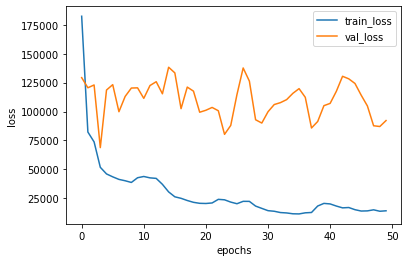

In [103]:
plt.plot(train_losses, label="train_loss")
plt.plot(val_losses, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## пример чтения сети из файла

In [118]:
#autoencoder_test = vanilla_autoencoder()
with torch.no_grad():
    autoencoder_test = torch.load('vanilla_auoencoder_00.pkl')
    autoencoder_test = autoencoder_test.to('cpu')
    for i, X_batch in enumerate(value_data):
        X_batch['profile'] = X_batch['profile'].to('cpu')
        reconstructed, embadding = autoencoder_test( X_batch['profile'] )
        loss = L(reconstructed, X_batch['profile'])
        #loss = L(reconstructed, X_batch[:, :(len(X_batch[0])-1)], embadding[:, :(len(embadding[0])-1)])
        if i==0:
            embaddings = customdataset(embadding, X_batch['ID'].copy())
            truth = customdataset(X_batch['profile'], X_batch['ID'].copy())
            pred = customdataset(reconstructed, X_batch['ID'].copy())
        else:
            embaddings.profile = torch.cat((embaddings.profile, embadding), 0)
            embaddings.name[len(embaddings.name):] = X_batch['ID']
            pred.profile = torch.cat((pred.profile, reconstructed), 0)
            pred.name[len(pred.name):] = X_batch['ID']
            truth.profile = torch.cat((truth.profile, X_batch['profile']), 0)
            truth.name[len(truth.name):] = X_batch['ID']
print(loss)
print(embaddings)

tensor(4.9312e-05)


## heat map

построение heat map, она показывает расстояние между средними векторами для каждой группы бактерий, на диагонали стоят средне-групповые расстояния 

In [70]:
def euclid (x):
    x = x**2
    l = np.sum(x)
    l = np.sqrt(l)
    return l

In [71]:
embaddings_heat = pd.DataFrame(embaddings[:]['profile'].numpy(), dtype = float)
print(len(embaddings[:]['ID']))
embaddings_heat['50'] = embaddings[:]['ID'] 
embaddings_heat.head()
embaddings_heat_mean = embaddings_heat.groupby('50').mean()
heat_map = np.zeros((len(embaddings_heat_mean.index), len(embaddings_heat_mean.index)))
heat_map = pd.DataFrame(heat_map, index=embaddings_heat_mean.index, 
                        columns=embaddings_heat_mean.index, dtype = float)
for i in embaddings_heat_mean.index:

    #для каждой группы ищем средне-групповое расстояние (ищем разность каждого ветора с каждым и делим на количество разностей) 
    mean = embaddings_heat.loc[embaddings_heat['50'] == i].drop(columns = ['50'], axis=1).to_numpy()
    s = np.zeros((len(mean[0])))
    count = 0
    for j in range (len(mean[:, 0])):
        for k in range (j+1, len(mean[:, 0])):
            s = s + mean[j] - mean[k]
            count = count + 1
    s = s/count
    e = euclid(s)
    heat_map.at[i, i] = e

    #ищем расстояние до средних векторов остальных групп mylist.index(element)
    for j in embaddings_heat_mean.index.values[np.where(embaddings_heat_mean.index.values == i)[0][0]: ]:
        s = embaddings_heat_mean.loc[i].to_numpy() - embaddings_heat_mean.loc[j].to_numpy()       
        e = euclid(s)
        heat_map.at[i, j] = e
print(heat_map.shape)    

3129
(74, 74)


полученная ранее матрица - верхне-треугольная, поэтому транспонируем ее, зануляем диагональ и складываем эти две матрицы

In [72]:
heat_map_t = heat_map.values.copy()
for i in range (len(heat_map['2U'])):
    heat_map_t[i, i] = 0
heat_map_t = heat_map_t.transpose()                  
heat_map.loc[ : , : ] = heat_map.values + heat_map_t     

рисуем heat map

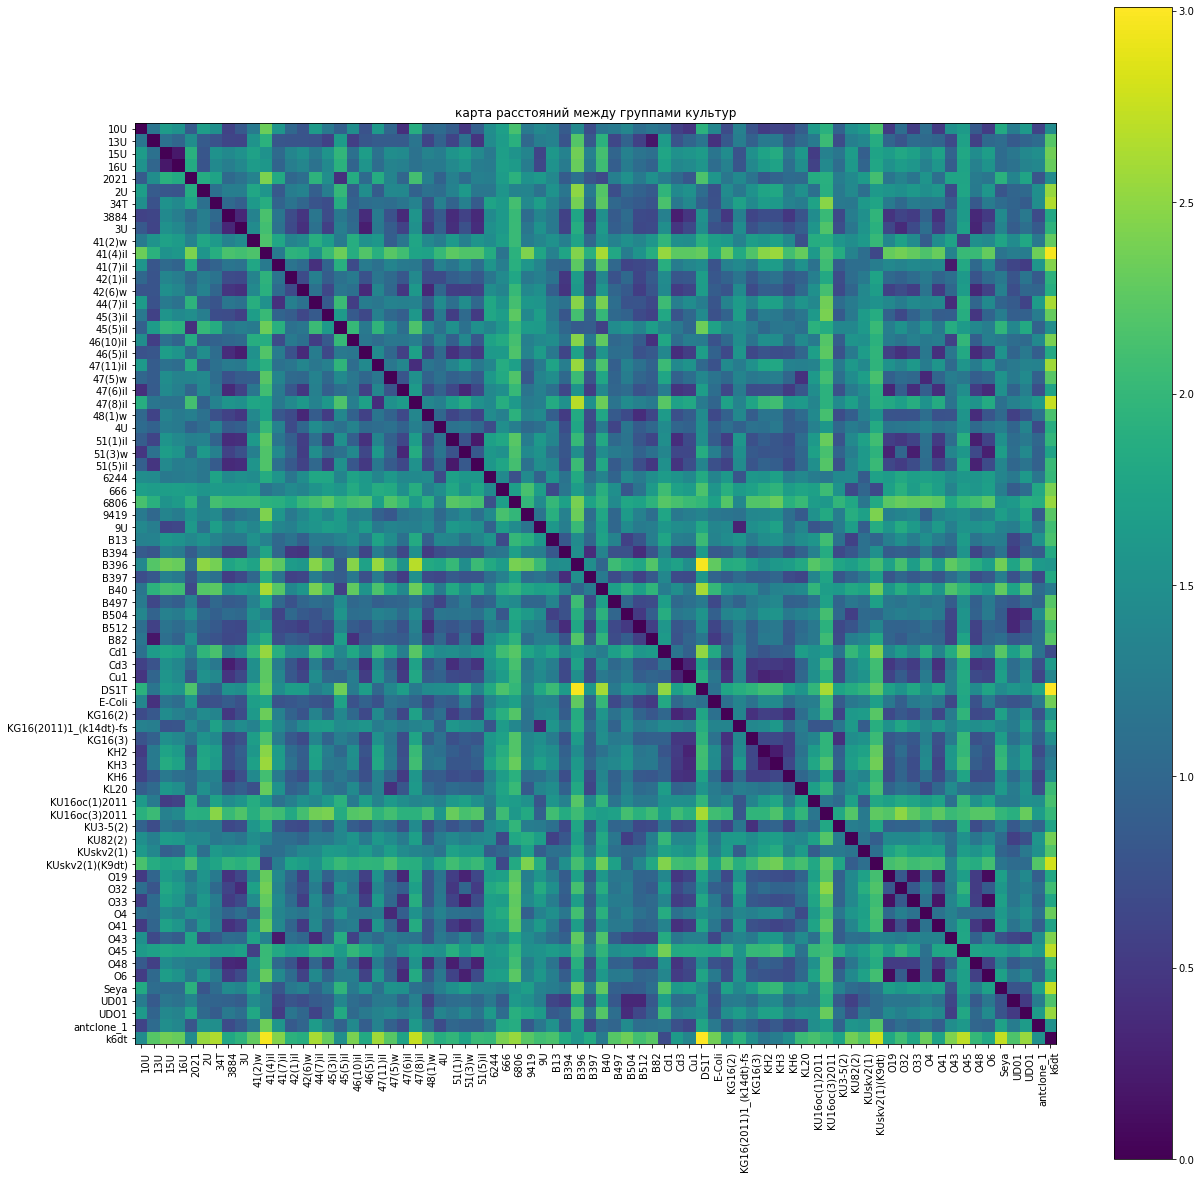

In [73]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks(np.arange(heat_map.shape[1]))
ax.set_yticks(np.arange(heat_map.shape[0]))
ax.set_xticklabels(heat_map)
ax.set_yticklabels(heat_map)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
im = ax.imshow(heat_map)
ax.set_title("карта расстояний между группами культур")
cbar = ax.figure.colorbar(im)
plt.show()

# Классификация


In [88]:
x_train, x_test, y_train, y_test = train_test_split (embaddings[:]['profile'], 
                                                     embaddings[:]['group'], train_size = 0.7)

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  5  0  0 24  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  2  0  0  4  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  1  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  7  1  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 10  0  0  0  0  0  0]
 [ 0  7  0  0  0  1  0  0  0  0  6  0  0 26  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  3  0  0 16  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  9  0  0 40  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  4  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0

C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VAE
пока забракован


In [91]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(12001, 7000),
            nn.ReLU(),
            nn.Linear(7000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 750),
            nn.ReLU(),
            nn.Linear(750, 100),
            nn.ReLU()
            )

        self.decoder = nn.Sequential(
            nn.ReLU(), 
            nn.Linear(50, 750),
            nn.ReLU(),
            nn.Linear(750, 4000),
            nn.ReLU(), 
            nn.Linear(4000, 7000),
            nn.ReLU(),
            nn.Linear(7000, 12001)
            )

        
    def gaussian_sampler(self, xx):
        m = xx[ : , :50] #полученное матожидание перед скрытым слоем 
        log = xx[ : , 50:] #полученный логарифм дисперсии в квадрате 
        #if self.training:
        sigma = torch.exp(0.5 * log) 
        N = torch.randn_like(sigma) 
        sample = m + (N * sigma) # создаем вектор скрытого состояния
        return sample, m, log
#         else: 
#             sample = m
#             return sample, m, log #на валидации, берем не случайный вектор с такими матожиданием и диссперсией а средний

    def forward(self, x):
        x = self.encoder(x)
        em, mu_f, logsigma_f = self.gaussian_sampler(x)
        reconstruction = self.decoder(em)
        return reconstruction, em, mu_f, logsigma_f

In [92]:
def L (rec, real, m, log):
    los=F.mse_loss(real, rec)+(-0.5 * torch.sum(1 + log - m ** 2 - log.exp()))
    return los  
autoencoder = VAE().to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

In [93]:
from torch.cuda.memory import list_gpu_processes
n_epochs = 20
train_losses = []
val_losses = []
embaddings = torch.Tensor()
truth = torch.Tensor()
pred = torch.Tensor()

for epoch in tqdm(range(n_epochs)): #tqdm для красивой загрузочки
    autoencoder.train()
    train_losses_per_epoch = []
    for X_batch in train_data:
        X_batch['profile'] = X_batch['profile'].to(device)
        optimizer.zero_grad()
        reconstructed, embadding, mu, logsigma  = autoencoder.forward(X_batch['profile'])
        loss = L(reconstructed, X_batch['profile'], mu, logsigma)
        loss.backward()
        optimizer.step()
        train_losses_per_epoch.append(loss.item())

    train_losses.append(np.mean(train_losses_per_epoch))

    autoencoder.eval()
    val_losses_per_epoch = []
    with torch.no_grad():
        for i, X_batch in enumerate(value_data):
            X_batch['profile'] = X_batch['profile'].to(device)
            reconstructed, embadding, mu, logsigma  = autoencoder(X_batch['profile'])
            loss = L(reconstructed, X_batch['profile'], mu, logsigma)
            val_losses_per_epoch.append(loss.item())
            if epoch == n_epochs - 1:
                embadding = embadding.to('cpu')
                reconstructed = reconstructed.to('cpu')
                X_batch['profile'] = X_batch['profile'].to('cpu')
                if i==0:
                    embaddings = customdataset(embadding, X_batch['group'].copy(), X_batch['ID'].copy())
                    truth = customdataset(X_batch['profile'], X_batch['group'].copy(), X_batch['ID'].copy())
                    pred = customdataset(reconstructed, X_batch['group'].copy(), X_batch['ID'].copy())
                else:
                    embaddings.cat(embadding, X_batch['group'], X_batch['ID'])
                    pred.cat(reconstructed, X_batch['group'], X_batch['ID'])
                    truth.cat(X_batch['profile'], X_batch['group'], X_batch['ID'])

    val_losses.append(np.mean(val_losses_per_epoch))


  0%|          | 0/20 [00:00<?, ?it/s]

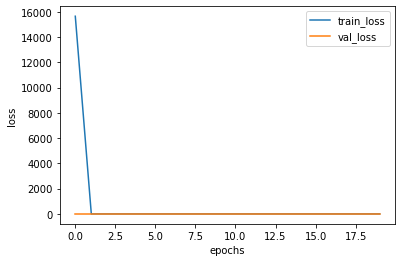

In [94]:
plt.plot(train_losses, label="train_loss")
plt.plot(val_losses, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [56]:
print(embaddings[:])

{'profile': tensor([[-0.0580, -0.0529,  1.3426,  ..., -0.6304,  0.1741,  0.8791],
        [ 1.1724, -0.7602,  1.7509,  ...,  1.2371,  1.8824,  0.6504],
        [-0.1866, -0.0034,  1.1323,  ..., -0.0798, -2.1678, -1.3434],
        ...,
        [-0.5130, -1.6938, -1.3094,  ...,  1.9922,  1.8420, -0.7178],
        [-0.7292,  2.0430,  1.0188,  ..., -0.2586,  1.1032, -0.4997],
        [ 0.4341, -1.2457, -0.5206,  ..., -2.0810, -0.3330,  0.6404]]), 'group': ['Bacillus_altitudinis', 'Bacillus_cereus', 'Bacillus_simplex', 'Geobacillus_subterraneus', 'Bacillus_megaterium', 'Bacillus_weihenstephanensis', 'Bacillus_cereus', 'Bacillus_megaterium', 'Geobacillus_subterraneus', 'Bacillus_simplex', 'Bacillus_licheniformis', 'Bacillus_chungangenis', 'Bacillus_licheniformis', 'Bacillus_licheniformis', 'Bacillus_megaterium', 'Bacillus_pumilus', 'Bacillus_clausii', 'Bacillus_mycoides', 'Bacillus_altitudinis', 'Bacillus_pumilus', 'Bacillus_simplex', 'Bacillus_pumilus', 'Bacillus_altitudinis', 'Bacillus_lic

# Denoising autoencoder

In [99]:
MS_profiles_set = customdataset (MS_profiles.iloc[:, :12001].to_numpy(),
                                 MS_profiles.iloc[:, 12001].to_numpy(),
                                 MS_profiles.iloc[:, 12002].to_numpy())

In [101]:
MS_profiles_sintes=pd.read_csv("MS_profiles\MS_profiles_sintes_norm_noise_70%",\
                               sep=';', index_col=0, header=0)
MS_profiles_test_noise = customdataset (MS_profiles_sintes.iloc[:, :12001].to_numpy(),
                                 MS_profiles_sintes.iloc[:, 12001].to_numpy(),
                                 MS_profiles_sintes.iloc[:, 12002].to_numpy())
MS_profiles_sintes

,3000.0,3001.0,3002.0,3003.0,3004.0,3005.0,3006.0,3007.0,3008.0,3009.0,...,14993.0,14994.0,14995.0,14996.0,14997.0,14998.0,14999.0,15000.0,15001.0,15002.0
0,0.000000,0.006989,0.009474,0.011865,0.014919,0.013818,0.014891,0.014112,0.011084,0.013803,...,0.002440,0.002064,0.001836,0.001591,0.001053,0.000658,0.000551,0.000000,Bacillus_licheniformis,KUskv2(1)
1,0.050752,0.042174,0.049792,0.234480,0.059472,0.278789,0.041838,0.270772,0.075113,0.072187,...,0.350758,0.060822,0.245882,0.091120,0.051303,0.007306,0.102057,0.159831,Bacillus_licheniformis,KUskv2(1)
2,0.420263,0.066359,0.113525,0.266631,0.393662,0.125975,0.187448,0.327325,0.133168,0.148680,...,0.001493,0.075750,0.263993,0.065484,0.109008,0.120433,0.118010,0.011517,Bacillus_licheniformis,KUskv2(1)
3,0.245498,0.395868,0.035560,0.225460,0.002371,0.165174,0.026902,0.040475,0.165995,0.004952,...,0.331879,0.113174,0.074429,0.019868,0.107074,0.203780,0.097816,0.346085,Bacillus_licheniformis,KUskv2(1)
4,0.121599,0.158166,0.108717,0.106919,0.000642,0.008891,0.061237,0.213243,0.073024,0.010503,...,0.171021,0.251814,0.031439,0.224661,0.007435,0.018862,0.077941,0.122306,Bacillus_licheniformis,KUskv2(1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0.134348,0.199805,0.092295,0.307700,0.183987,0.043417,0.013462,0.072645,0.112319,0.046534,...,0.229061,0.006825,0.286682,0.029532,0.182747,0.248892,0.109122,0.012088,Bacillus_chungangenis,45(3)il
3125,0.235636,0.193649,0.099837,0.231452,0.137942,0.078363,0.095240,0.048409,0.350570,0.030576,...,0.199706,0.209450,0.136124,0.144988,0.103707,0.087394,0.089288,0.263372,Bacillus_chungangenis,45(3)il
3126,0.102625,0.255445,0.068454,0.068656,0.014491,0.172723,0.174092,0.210607,0.294957,0.235582,...,0.130411,0.078540,0.166205,0.098440,0.334967,0.239024,0.031911,0.157678,Bacillus_chungangenis,45(3)il
3127,0.290101,0.137572,0.282442,0.222605,0.037292,0.239331,0.104644,0.008854,0.053348,0.186695,...,0.152966,0.026621,0.139623,0.275530,0.093140,0.042117,0.164683,0.089924,Bacillus_chungangenis,45(3)il


**создаем test и value выборки**

In [102]:
batch_s=16
train, value = train_test_split(MS_profiles_set, train_size=0.7, shuffle=True)#получили value выбороку
train_data = DataLoader(MS_profiles_set, batch_size=batch_s, shuffle=True)#а на train отправляем весь\
#MS_profiles_set что бы модель знала профили всех имеющихся бактерий
value_data = DataLoader(value, batch_size=batch_s)

**лосс-функция/оптимайзер**

In [103]:
L = F.mse_loss #nn.torch.functional....
autoencoder = vanilla_autoencoder().to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

**тренировка**

In [104]:
from torch.cuda.memory import list_gpu_processes
n_epochs = 100
train_losses = []
val_losses = []
embaddings = torch.Tensor()
truth = torch.Tensor()
pred = torch.Tensor()
noise_factor = 1/40

for epoch in tqdm(range(n_epochs)): #tqdm для красивой загрузочки
    autoencoder.train()
    train_losses_per_epoch = []
    for X_batch in train_data:
        noise = X_batch['profile'] + noise_factor*\
        torch.FloatTensor(np.random.normal(loc=0.0, scale=1.0, size= list(X_batch['profile'].size())))#шумим
        X_batch['profile'] = X_batch['profile'].to(device)#чистые векторы 
        #print(X_batch['profile'].size().numpy())
        noise = noise.to(device)
        #print(noise.max())
        optimizer.zero_grad()
        reconstructed, embadding = autoencoder.forward(noise)#скармливаем шум
        loss = L(reconstructed, X_batch['profile'])#сравниваем с читыми
        loss.backward()
        optimizer.step()
        train_losses_per_epoch.append(loss.item())

    train_losses.append(np.mean(train_losses_per_epoch))

    autoencoder.eval()
    val_losses_per_epoch = []
    with torch.no_grad():
        for i, X_batch in enumerate(value_data):
            noise = X_batch['profile'] + noise_factor * \
            torch.FloatTensor(np.random.normal(loc=0.0, scale=1.0, size=list(X_batch['profile'].size())))#шумим
            X_batch['profile'] = X_batch['profile'].to(device)
            noise = noise.to(device)
            reconstructed, embadding = autoencoder(noise)
            loss = L(reconstructed, X_batch['profile'])
            val_losses_per_epoch.append(loss.item())
            if epoch == n_epochs - 1:
                embadding = embadding.to('cpu')
                reconstructed = reconstructed.to('cpu')
                X_batch['profile'] = X_batch['profile'].to('cpu')
                if i==0:
                    embaddings = customdataset(embadding, X_batch['group'].copy(), X_batch['ID'].copy())
                    truth = customdataset(X_batch['profile'], X_batch['group'].copy(), X_batch['ID'].copy())
                    pred = customdataset(reconstructed, X_batch['group'].copy(), X_batch['ID'].copy())
                else:
                    embaddings.cat(embadding, X_batch['group'], X_batch['ID'])
                    pred.cat(reconstructed, X_batch['group'], X_batch['ID'])
                    truth.cat(X_batch['profile'], X_batch['group'], X_batch['ID'])

    val_losses.append(np.mean(val_losses_per_epoch))


  0%|          | 0/100 [00:00<?, ?it/s]

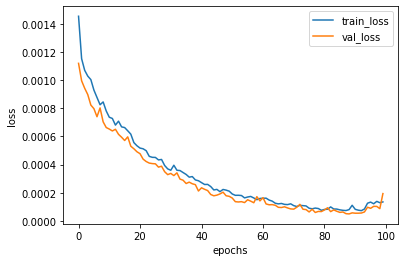

In [105]:
plt.plot(train_losses, label="train_loss")
plt.plot(val_losses, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [106]:
torch.save (nn.Sequential(autoencoder.encoder, autoencoder.fc), 'DAE_norm_noise_70%.pkl')

In [107]:
#autoencoder_test = vanilla_autoencoder()
#autoencoder = torch.load('DAE_norm_noise_10%.pkl')
with torch.no_grad():
    autoencoder_test = autoencoder
    autoencoder_test = autoencoder_test.to('cpu')
    #train, value = train_test_split(MS_profiles_test_noise, train_size=0.1, shuffle=True)
    print (len(MS_profiles_test_noise))
    value_loader = DataLoader(MS_profiles_test_noise, batch_size = len(MS_profiles_test_noise), shuffle = True)
    for i in value_loader: 
        pred, embaddings = autoencoder_test( i['profile'] )
        embaddings = customdataset(embaddings, i['group'].copy(),\
                                   i['ID'].copy())

3129


In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier_group = RandomForestClassifier()
classifier_ID = RandomForestClassifier()
classifier_group.fit(embaddings[:]['profile'], embaddings[:]['group'])
classifier_ID.fit(embaddings[:]['profile'], embaddings[:]['ID'])

RandomForestClassifier()

## сохраним лес

In [109]:
import pickle
with open('forest_norm_noise_70%_group', 'wb') as f:
    pickle.dump(classifier_group, f)

In [110]:
import pickle
with open('forest_norm_noise_70%_ID', 'wb') as f:
    pickle.dump(classifier_ID, f)

*прочитаем его*

In [45]:
with open('forest_norm_noise_10%', 'rb') as f:
    classifier = pickle.load(f)

## Инференс

In [112]:
MS_profiles_inference=pd.read_csv("MS_profiles\MS_profiles_sintes_norm_noise_70%_inference",\
                               sep=';', index_col=0, header=0)
MS_profiles_inference_set = customdataset (MS_profiles_inference.iloc[:, :12001].to_numpy(),
                                 MS_profiles_inference.iloc[:, 12001].to_numpy(),
                                 MS_profiles_inference.iloc[:, 12002].to_numpy())
autoencoder_inference = torch.load('DAE_norm_noise_70%.pkl')
with torch.no_grad():
    autoencoder_inference = autoencoder_inference.to('cpu')
    value_loader = DataLoader(MS_profiles_inference_set, batch_size = \
                              len(MS_profiles_inference_set), shuffle = True)
    for i in value_loader: 
        embaddings_inference = autoencoder_inference( i['profile'] )
        embaddings_inference = customdataset(embaddings_inference, i['group'].copy(),\
                                   i['ID'].copy())

In [113]:
with open('forest_norm_noise_70%_group', 'rb') as f:
    classifier_group = pickle.load(f)
pred = classifier_group.predict(embaddings_inference[:]['profile'])
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(embaddings_inference[:]['group'], pred))
print(classification_report(embaddings_inference[:]['group'], pred))
report = classification_report(embaddings_inference[:]['group'], pred, output_dict=True)
rep = pd.DataFrame(report).transpose()    

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  2  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0

C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metr

In [114]:
#сохраним отчет
rep.to_csv(r"classification_result_norm_noise_70%_group.csv", sep=';', header=True, index=True,)

In [115]:
with open('forest_norm_noise_70%_ID', 'rb') as f:
    classifier_ID = pickle.load(f)
pred = classifier_ID.predict(embaddings_inference[:]['profile'])
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(embaddings_inference[:]['ID'], pred))
print(classification_report(embaddings_inference[:]['ID'], pred))
report = classification_report(embaddings_inference[:]['ID'], pred, output_dict=True)
rep = pd.DataFrame(report).transpose()    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                        precision    recall  f1-score   support

                   10U       0.00      0.00      0.00         1
                   13U       0.00      0.00      0.00         1
                   15U       0.50      1.00      0.67         1
                   16U       1.00      1.00      1.00         1
                  2021       0.50      1.00      0.67         1
                    2U       0.00      0.00      0.00         1
                   34T       0.00      0.00      0.00         1
                  3884       0.50      1.00      0.67         1
                    3U       0.00      0.00      0.00         1
                41(2)w       0.00      0.00      0.00         1
               41(4)il       0.50      1.00      0.67         1
               41(7)il       1.00      1.00      1.00         1
               42(1)il       1.00      1.00    

C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishs\anaconda3\lib\site-packages\sklearn\metr

In [116]:
rep.to_csv(r"classification_result_norm_noise_70%_ID.csv", sep=';', header=True, index=True,)

## анализ пиков

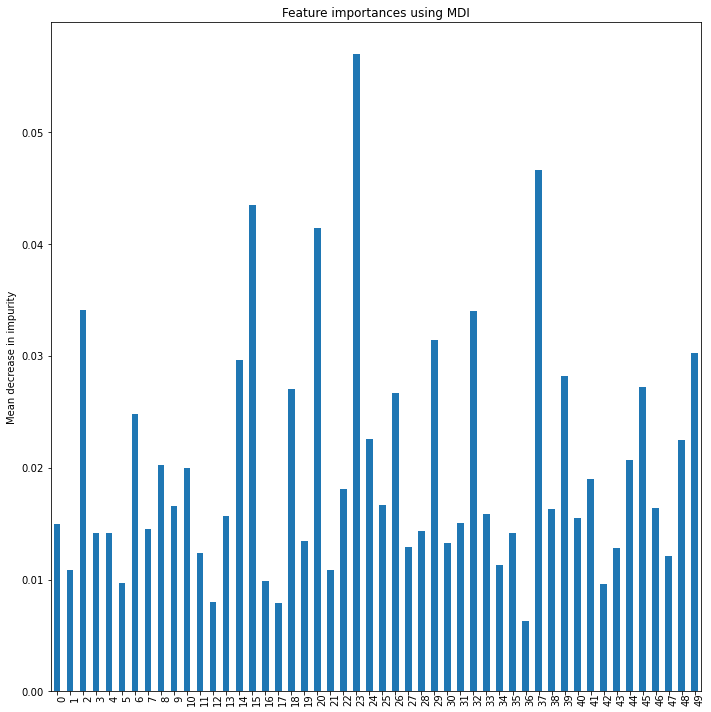

In [18]:
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index={i for i in range (len(embaddings[0]['profile']))})
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0) #deviation - мера распределения
fig, ax = plt.subplots(figsize=(10,10))
#fig = plt.figure(figsize=(20,20))
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.setp(ax.get_xticklabels(), rotation=90, rotation_mode="anchor")
fig.tight_layout()

In [90]:
top = forest_importances.nlargest(10)
J = np.zeros(len(top.index)) # массив для хранения индексов макимальных весов 
#ищем максимумы между 3 и 4 слоями енкодера
for j, i in enumerate(top.index):
    maximum, J[j] = torch.max(autoencoder.fc.weight[i], dim = 0)
print(J)
#ищем максимумы между 2 и 3 слоями енкодера
for j in range(len(J)):
    maximum, J[j] = torch.max((autoencoder.encoder[2]).weight[int(J[j])], dim = 0)
print(J)
#ищем максимумы между 1 и 2 слоями енкодера
mz_features = np.array([], dtype = int)
for j in range(len(J)):
    current = (autoencoder.encoder[0]).weight[int(J[j])]
    beta = random.uniform(1, 2.5)
    T = torch.mean(current) + beta*torch.std(current)
    for i in range(len((autoencoder.encoder[0]).weight[0])):
        if (autoencoder.encoder[0]).weight[int(J[j]), i] >= float(T):
            mz_features = np.append(mz_features, i)
print (len(mz_features))
print(mz_features)                  

[110. 310. 566. 366. 418. 274. 434. 287.   4. 391.]
[ 411. 4504. 3577. 5428. 3711. 5331. 2894.  411. 3968. 4351.]
6293
[    0    17    20 ... 11938 11982 11998]


In [92]:
mz_features = np.unique(mz_features) + 3000
print (len(mz_features))
print (mz_features)

4783
[ 3000  3003  3007 ... 14985 14994 14998]


In [93]:
np.save('mz_features', mz_features)

In [95]:
np.savetxt('mz_features_txt', mz_features, fmt='%d')